### COMP3314 ML
Guo Shunhua 3035447635 
<br>
# CNN

# <u>Result reading and visualization</u>

## Overview
1. [Introduction](#s1) 
2. [Read Result](#s2)
3. [Visualization of Loss and Accuracy for single case](#s3)
4. [With and without ReLU activation layer comparison](#s4)
5. [Parameter Analysis](#s5)
----- 


<a id=’s1’></a>

## 1 Introduction

This notebook will visualize the trianing result from CNN on handwriting digital data.

The detailed implementation of the CNN is contained in .py files.

In [156]:
import numpy as np
import pandas as pd

# Matplotlib for visualization 
import matplotlib.pyplot as plt
%matplotlib inline

import os
import re
import json

<a id=’s2’></a>

## 2 Read Result

In [157]:
class result(object):
    def __init__(self, save_name, label=None):
        self.save_dir = os.path.join('results', save_name)
        self.data = None
        if not label:
            self.label = save_name
        else:
            self.label = label
    
    def read(self):
        path = os.path.join(self.save_dir, "result.json")
        if  not os.path.exists(path):
            print("this result file does not exist")
            return
        
        with open(path, 'r') as f:
            data = json.load(f) 
        self.data = data

In [158]:
re = result('gamma2', label='gamma = 0.2')
re.read()
# re.data

<a id=’s3’></a>

## 3 Visualization of Loss and Accuracy for single case

### Plotting Loss 

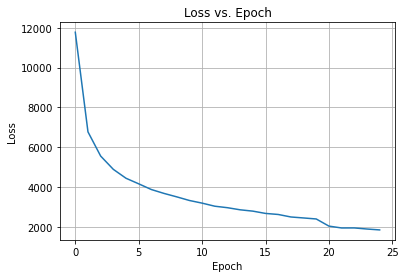

In [159]:
data = re.data['loss']

plt.plot(range(len(data)), data, label=re.label) 
plt.title("Loss vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.savefig(os.path.join(re.save_dir, "Loss.png"))

### Plotting Accuracy

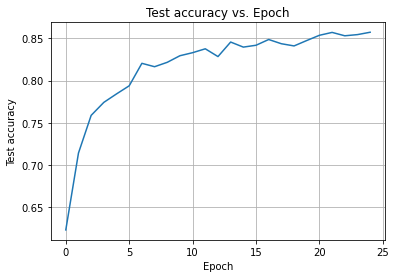

In [160]:
if not re.data["PARAM"]["if_eval"]:
    print("no evaluation in training process")
else:
    data = re.data['test_accuracy']
    plt.plot(range(len(data)), data, label=re.label) 
    plt.title("Test accuracy vs. Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Test accuracy")
    plt.grid()
    plt.savefig(os.path.join(re.save_dir, "Accuracy.png"))

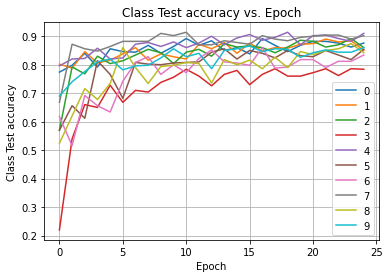

In [161]:
if not re.data["PARAM"]["if_eval"]:
    print("no evaluation in training process")
else: 
    data_dict = re.data['test_class_accuracy']
    for k, data in data_dict.items():
        plt.plot(range(len(data)), data, label=k) 
        plt.title("Class Test accuracy vs. Epoch")
        plt.xlabel("Epoch")
        plt.ylabel("Class Test accuracy")
        plt.legend()
    plt.grid()
    plt.savefig(os.path.join(re.save_dir, "Class Accuracy.png"))
    plt.show()

<a id=’s4’></a>

## 4 With and without ReLU activation layer comparison

In [137]:
w_4relu = result('40w_4relu', label='w_4relu')
w_4relu.read()
wo_relu = result('40wo_relu', label='wo_relu')
wo_relu.read()
w_2relu = result('40w_2relu', label='w_2relu')
w_2relu.read()

# results = [w_4relu, w_2relu, wo_relu]

lenet = result('40lenet', label='lenet')
lenet.read()
results = [w_4relu, w_2relu, wo_relu, lenet]

### Plotting Loss 

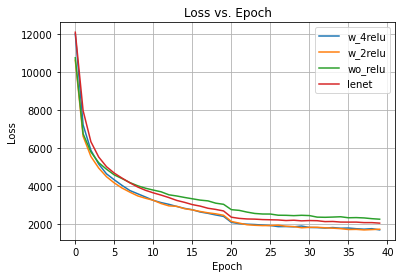

In [138]:
for re in results:
    data = re.data['loss']
    plt.plot(range(len(data)), data, label=re.label) 
plt.title("Loss vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.savefig(os.path.join(os.path.join('results', 'relu_analysis'), "Loss.png"))

### Plotting Accuracy

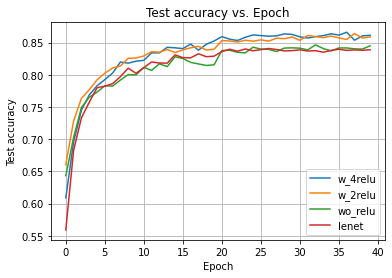

In [139]:
for re in results:
    if not re.data["PARAM"]["if_eval"]:
        print("no evaluation in training process")
    else:
        data = re.data['test_accuracy']
        plt.plot(range(len(data)), data, label=re.label) 
plt.title("Test accuracy vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Test accuracy")
plt.legend()
plt.grid()
plt.savefig(os.path.join(os.path.join('results', 'relu_analysis'), "Accuracy.png"))

<a id=’s5’></a>

## 5 Parameter Analysis

### Learning Rate

In [140]:
re3 = result('1e-3', label='1e-3')
re3.read()

re4 = result('40w_2relu', label='1e-4')
re4.read()

### Plotting Loss 

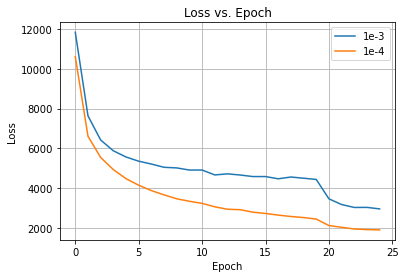

In [141]:
data3 = re3.data['loss']
plt.plot(range(len(data3)), data3, label=re3.label) 

data4 = re4.data['loss']
plt.plot(range(len(data3)), data4[:len(data3)], label=re4.label) 

plt.title("Loss vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.savefig(os.path.join(os.path.join('results', 'lr_analysis'), "Loss.png"))

### Plotting Accuracy

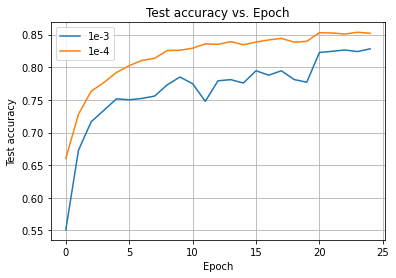

In [142]:
data3 = re3.data['test_accuracy']
plt.plot(range(len(data3)), data3, label=re3.label) 

data4 = re4.data['test_accuracy']
plt.plot(range(len(data3)), data4[:len(data3)], label=re4.label) 

plt.title("Test accuracy vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Test accuracy")
plt.legend()
plt.grid()
plt.savefig(os.path.join(os.path.join('results', 'lr_analysis'), "Accuracy.png"))

### Decay strategy (step size)

In [167]:
re3 = result('step5', label='step=5')
re3.read()

re4 = result('40w_2relu', label='step=20')
re4.read()

### Plotting Loss 

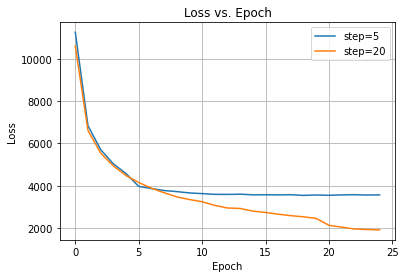

In [168]:
data3 = re3.data['loss']
plt.plot(range(len(data3)), data3, label=re3.label) 

data4 = re4.data['loss']
plt.plot(range(len(data3)), data4[:len(data3)], label=re4.label) 

plt.title("Loss vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.savefig(os.path.join(os.path.join('results', 'step_analysis'), "Loss.png"))

### Plotting Accuracy

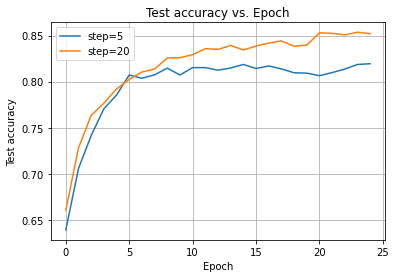

In [169]:
data3 = re3.data['test_accuracy']
plt.plot(range(len(data3)), data3, label=re3.label) 

data4 = re4.data['test_accuracy']
plt.plot(range(len(data3)), data4[:len(data3)], label=re4.label) 

plt.title("Test accuracy vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Test accuracy")
plt.legend()
plt.grid()
plt.savefig(os.path.join(os.path.join('results', 'step_analysis'), "Accuracy.png"))

### Decay strategy (gamma)

In [170]:
re3 = result('gamma2', label='gamma=0.2')
re3.read()

re4 = result('40w_2relu', label='gamma=0.1')
re4.read()

### Plotting Loss 

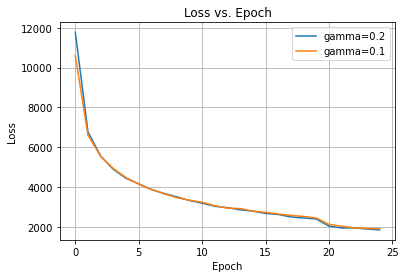

In [171]:
data3 = re3.data['loss']
plt.plot(range(len(data3)), data3, label=re3.label) 

data4 = re4.data['loss']
plt.plot(range(len(data3)), data4[:len(data3)], label=re4.label) 

plt.title("Loss vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.savefig(os.path.join(os.path.join('results', 'gamma_analysis'), "Loss.png"))

### Plotting Accuracy

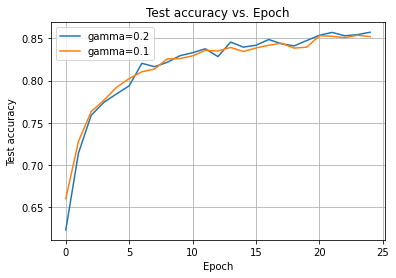

In [172]:
data3 = re3.data['test_accuracy']
plt.plot(range(len(data3)), data3, label=re3.label) 

data4 = re4.data['test_accuracy']
plt.plot(range(len(data3)), data4[:len(data3)], label=re4.label) 

plt.title("Test accuracy vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Test accuracy")
plt.legend()
plt.grid()
plt.savefig(os.path.join(os.path.join('results', 'gamma_analysis'), "Accuracy.png"))

## Epoch Time

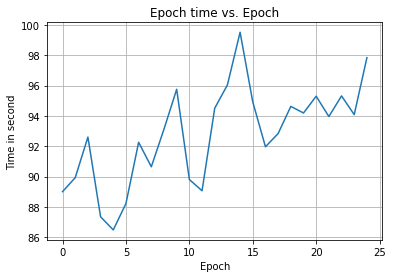

In [147]:
re4 = result('step5', label='epoch_time')
re4.read()

data4 = re4.data['time']
plt.plot(range(len(data4)), data4[:len(data3)]) 

plt.title("Epoch time vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Time in second")
plt.grid()